In [326]:
import numpy as np
from lab2_tools import *
from lab2_proto import *
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.load('lab2_data.npz',allow_pickle=True)['data']
data[1]

{'filename': '/home/giampi/corpora/tidigits/disc_4.2.1/tidigits/test/man/bm/ob.wav',
 'samplingrate': 20000,
 'gender': 'man',
 'speaker': 'bm',
 'digit': 'o',
 'repetition': 'b',
 'samples': array([  0,   0,   4, ..., -14, -12, -11], dtype=int16),
 'lmfcc': array([[ 7.56555613e+01, -5.09331318e+01,  1.24373167e+02,
          8.66860927e+01,  6.09990191e+01, -5.33969397e+01,
         -1.89216728e+02, -1.37867835e+02, -7.23267739e+01,
          3.94520921e+01,  1.13737888e+02,  3.04398336e+00,
         -6.25438677e+01],
        [ 5.54727432e+01, -1.14905061e+02,  3.59956427e+01,
         -1.29660924e+00,  5.43764725e+01, -3.32124391e+01,
         -6.15839914e+01, -2.12368930e+01, -7.28300982e+01,
          3.19687566e+01,  1.21250775e+02,  7.25747558e+01,
         -1.21176972e+02],
        [ 9.94282664e+01, -7.63122361e+01,  4.27260216e+01,
          6.05804293e+01,  1.08758943e+02,  2.85820740e+01,
         -1.11697296e+02, -1.00265732e+02, -2.26597333e+01,
          4.13450228e+01,  2

In [3]:
# Load parameters
phoneHMMs_all = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()

phoneHMMs_one = load('lab2_models_onespkr.npz',allow_pickle=True)['phoneHMMs'].item()




In [234]:
# Load example data
example = load('lab2_example.npz',allow_pickle=True)['example'].item()
print(example.keys())
samplingrate_ex = example['samplingrate']
gender_ex = example['gender']
speaker_ex = example['speaker']
digit_ex = example['digit']
repetition_ex = example['repetition']
samples_ex = example['samples']
lmfcc_ex = example['lmfcc']
obsloglik_ex = example['obsloglik']
logalpha_ex = example['logalpha']
loglik_ex = example['loglik']
vloglik_ex = example['vloglik']
vpath_ex = example['vpath']
logbeta_ex = example['logbeta']
loggamma_ex = example['loggamma']

dict_keys(['filename', 'samplingrate', 'gender', 'speaker', 'digit', 'repetition', 'samples', 'lmfcc', 'obsloglik', 'logalpha', 'loglik', 'vloglik', 'vpath', 'logbeta', 'loggamma'])


In [5]:
print(list(sorted(phoneHMMs_one.keys())))
print(phoneHMMs_one['sp'].keys())


['ah', 'ao', 'ay', 'eh', 'ey', 'f', 'ih', 'iy', 'k', 'n', 'ow', 'r', 's', 'sil', 'sp', 't', 'th', 'uw', 'v', 'w', 'z']
dict_keys(['name', 'startprob', 'transmat', 'means', 'covars'])


In [21]:
covars = phoneHMMs_one['sil']['covars']
means = phoneHMMs_one['ow']['means']
print(np.array(covars).shape) # diagonal covariance matrixs stored as rows
print(np.array(means).shape) 
print(phoneHMMs_one['eh']['startprob'])

(3, 13)
(3, 13)
[1. 0. 0. 0.]


In [7]:
from prondict import *
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']
print(isolated)

{'o': ['sil', 'ow', 'sil'], 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'], '1': ['sil', 'w', 'ah', 'n', 'sil'], '2': ['sil', 't', 'uw', 'sil'], '3': ['sil', 'th', 'r', 'iy', 'sil'], '4': ['sil', 'f', 'ao', 'r', 'sil'], '5': ['sil', 'f', 'ay', 'v', 'sil'], '6': ['sil', 's', 'ih', 'k', 's', 'sil'], '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'], '8': ['sil', 'ey', 't', 'sil'], '9': ['sil', 'n', 'ay', 'n', 'sil']}


## 4) Concatinating HMMs

In [8]:
hmm1 = phoneHMMs_one['f']
hmm2 = phoneHMMs_one['sp']

In [9]:
print(hmm1['transmat'])
print()
print(hmm2['transmat'])
print()
print()
print(hmm1['startprob'])
print(hmm2['startprob'])
print("\n==========================================================")
print("==========================================================\n")
twoHMms=concatTwoHMMs(hmm1, hmm2)
print(twoHMms['startprob'])
print()
print(twoHMms['transmat'])

[[0.8437548 0.1562452 0.        0.       ]
 [0.        0.7090222 0.2909778 0.       ]
 [0.        0.        0.3064214 0.6935785]
 [0.        0.        0.        1.       ]]

[[0.8144019 0.1855981]
 [0.        1.       ]]


[1. 0. 0. 0.]
[0.2403483 0.7596517]


[1. 0. 0. 0. 0.]

[[0.8437548  0.1562452  0.         0.         0.        ]
 [0.         0.7090222  0.2909778  0.         0.        ]
 [0.         0.         0.3064214  0.16670041 0.52687809]
 [0.         0.         0.         0.8144019  0.1855981 ]
 [0.         0.         0.         0.         1.        ]]


In [22]:
wordHMMs = {}
wordHMMs['o'] = concatHMMs(phoneHMMs_one, isolated['o'])
wordHMMs['o']['means'].shape

(9, 13)

## 5) HMM Likelihood and Recognition

In [30]:
obsloglik = log_multivariate_normal_density_diag(example['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars'])


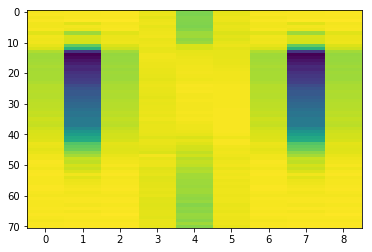

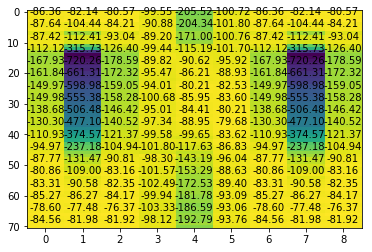

(71, 9)

In [48]:
from matplotlib import pyplot as plt

plt.imshow(obsloglik_ex, interpolation='nearest', aspect='auto')
plt.show()

plt.imshow(obsloglik, interpolation='nearest', aspect='auto')
for (i, j), z in np.ndenumerate(obsloglik):
    if np.mod(i,4)==0 and np.mod(j,1)==0:
        plt.text(j, i, '{:.2f}'.format(z), ha='center', va='center')

plt.show()
obsloglik_ex.shape

From the pattern shown in the plot above we can clearly see that steps 1-10 and 45-1 correspond to sil, the rest of the steps in the middle correspond to 'ow'.
It looks like the observations(steps) during 'ow' have small likelihoods for the 1'st and 7'th gaussian component whereas 'sil' is more equally distributed. In addition to that we observe that 'sil' tends to have low likelihood values for the 4th gaussian component. 

The low likelihood values are shown in blue in the figure above
(the smaller the value --> the more negative --> the darker).

## a) Forward Algorithm

In [132]:
def forward(log_emlik, log_startprob, log_transmat):
    """Forward (alpha) probabilities in log domain.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states  log P(Oi|Xi)
        log_startprob: log probability to start in state i                    log P(Xi)
        log_transmat: log transition probability from state i to j            log P(Xj|Xi)

    Output:
        forward_prob: NxM array of forward log probabilities for each of the M states in the model
    """
    
    log_startprob = log_startprob[:-1]
    log_transmat = log_transmat[:-1,:-1]
    
    N, M = log_emlik.shape 
    forward_prob = np.zeros((N, M))                    # [N X M]      P(O1:)

    forward_prob[0,:] = log_startprob + log_emlik[0, :]

    for n in range(1,N):
        for i in range(M):
            forward_prob[n,i] = logsumexp(forward_prob[n-1,:]+log_transmat[:,i] ) + log_emlik[n,i]

    return forward_prob

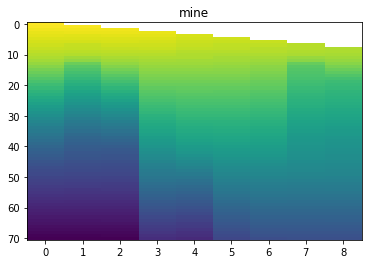

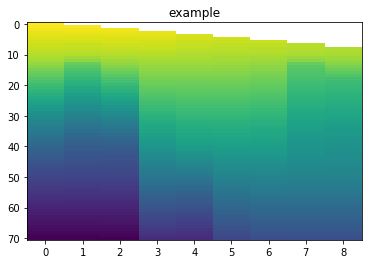

In [148]:
import warnings
warnings.filterwarnings('ignore')

log_startprob = np.log(wordHMMs['o']['startprob'])
log_transmat = np.log(wordHMMs['o']['transmat'])

logalpha = forward(obsloglik, log_startprob, log_transmat)

np.allclose(logalpha_ex, logalpha)

plt.imshow(logalpha, interpolation='nearest', aspect='auto')
plt.title("mine")
plt.show()
plt.imshow(logalpha_ex, interpolation='nearest', aspect='auto')
plt.title("example")
plt.show()

## b) Viterbi Approximation

$V_n(i) = max_{q_{0:t-1}}  P(O_{0:n}, q_t)$

In [312]:
def viterbi(log_emlik, log_startprob, log_transmat, forceFinalState=True):
    """Viterbi path(decoding).

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: transition log probability from state i to j
        forceFinalState: if True, start backtracking from the final state in
                  the model, instead of the best state at the last time step

    Output:
        viterbi_loglik: log likelihood of the best path
        viterbi_path: best path
    """
    log_startprob = log_startprob[:-1]
    log_transmat = log_transmat[:-1,:-1]

    N, M = log_emlik.shape
    V = np.zeros((N,M)) # Viterbi loglikelihoods
    V_path = np.zeros((N,M),dtype=np.int64) # Viterbi indexes
    
    viterbi_path = np.zeros(N,dtype=np.int64)
    
    
    V[0,:] = log_startprob + log_emlik[0,:]
    for n in range(1,N):
        for i in range(M):
            # highest log likelihood to come to state i in time n
            V[n,i] = np.max(V[n-1,:]+log_transmat[:,i] + log_emlik[n,i])
            # best previous state in time n-1 that brought us to state i in time n
            V_path[n,i] = np.argmax(V[n-1,:]+log_transmat[:,i] + log_emlik[n,i])
    
    # path backtracking 
    viterbi_path[-1] = np.argmax(V[-1,:])
    for i in range(V_path.shape[0]-2,0,-1):
        viterbi_path[i] = V_path[i+1,viterbi_path[i+1]]

    
    return np.max(V[-1,:]), viterbi_path

In [320]:
len(vpath_ex)
vpath_ex.shape

(71,)

True
True


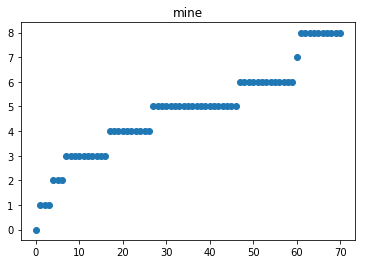

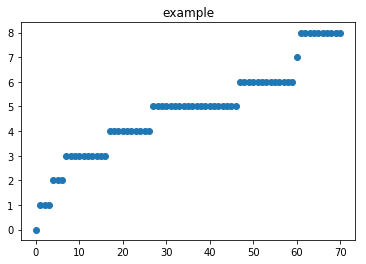

In [325]:
viterbi_loglik, viterbi_path = viterbi(log_emlik, log_startprob, log_transmat, forceFinalState=True)
print(np.allclose(viterbi_path, vpath_ex))
print(np.allclose(viterbi_loglik, vloglik_ex))
plt.scatter(np.arange(len(viterbi_path)),viterbi_path)
plt.title("mine")
plt.show()
plt.scatter(np.arange(len(vpath_ex)),vpath_ex)
plt.title("example")
plt.show()

## c) Backward Algorithm

In [99]:
def backward(log_emlik, log_startprob, log_transmat):
    """Backward (beta) probabilities in log domain.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: transition log probability from state i to j

    Output:
        backward_prob: NxM array of backward log probabilities for each of the M states in the model
    """